In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barrow us
linxia cn
zhirnovsk ru
bambous virieux mu
illoqqortoormiut gl
acarau br
taolanaro mg
vila velha br
barentsburg sj
provideniya ru
narsaq gl
xichang cn
busselton au
lusambo cd
kruisfontein za
bluff nz
bluff nz
mys shmidta ru
rikitea pf
aswan eg
rikitea pf
jamestown sh
punta arenas cl
hermanus za
kot khai in
vao nc
attawapiskat ca
severo-kurilsk ru
busselton au
rikitea pf
puerto ayora ec
puerto ayora ec
ust-maya ru
marataizes br
point pleasant us
hirara jp
namibe ao
busselton au
chintamani in
punta arenas cl
magistralnyy ru
sarahan in
hilo us
richards bay za
flinders au
muyezerskiy ru
wulanhaote cn
ushuaia ar
sentyabrskiy ru
rikitea pf
port alfred za
avarua ck
atuona pf
ushuaia ar
ushuaia ar
byron bay au
sentyabrskiy ru
barawe so
georgetown sh
rawannawi ki
egvekinot ru
nizhneyansk ru
cape town za
port alfred za
pangnirtung ca
rikitea pf
longyearbyen sj
ribeira grande pt
soe id
henties bay na
taolanaro mg
bredasdorp za
rikitea pf
waitati nz
takanosu jp
san ramon bo
kollumerland n

hermanus za
rikitea pf
carnarvon au
barentsburg sj
san carlos de bariloche ar
albany au
khatanga ru
dalinghe cn
ilulissat gl
qui nhon vn
punta arenas cl
punta arenas cl
hobart au
butaritari ki
barrow us
ushuaia ar
kaeo nz
new norfolk au
zhigansk ru
sakaiminato jp
misratah ly
ushuaia ar
cidreira br
felanitx es
severo-kurilsk ru
lebu cl
ribeira grande pt
butaritari ki
bonga et
san cristobal ec
lyuban ru
hami cn
acapulco mx
iqaluit ca
pevek ru
qaanaaq gl
burica pa
pevek ru
tangzhai cn
khatanga ru
bud no
hermanus za
verkhnyaya toyma ru
tasiilaq gl
cape town za
ust-kulom ru
cape town za
abu samrah qa
tsihombe mg
port alfred za
rikitea pf
huarmey pe
coihaique cl
sao joao da barra br
yellowknife ca
fare pf
mukhen ru
passo de camaragibe br
albany au
castro cl
mar del plata ar
nanortalik gl
jamestown sh
vzmorye ru
ilulissat gl
mataura pf
kapaa us
arraial do cabo br
albany au
aboyne gb
haines junction ca
kavieng pg
sao joao da barra br
tabiauea ki
thompson ca
macklin ca
busselton au
ormara pk
ba

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38d9019c481b5b784ae5d2d256b31620


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | sur
Processing Record 2 of Set 12 | kamiiso
Processing Record 3 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 12 | seymchan
Processing Record 5 of Set 12 | ponta delgada
Processing Record 6 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 12 | te anau
Processing Record 8 of Set 12 | victoria
Processing Record 9 of Set 12 | visby
Processing Record 10 of Set 12 | poum
Processing Record 11 of Set 12 | narsaq
Processing Record 12 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 13 of Set 12 | chokurdakh
Processing Record 14 of Set 12 | ribeira grande
Processing Record 15 of Set 12 | arraial do cabo
Processing Record 16 of Set 12 | richards bay
Processing Record 17 of Set 12 | blankenberge
Processing Record 18 of Set 12 | wanning
Processing Record 19 of Set 12 | arman
Processing Record 20 of Set 12 | saint-pierre
P

In [28]:
len(city_data)

571

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mwinilunga,-11.7358,24.4293,57.25,54,1,4.36,ZM,2021-08-01 22:26:05
1,Zaozerne,45.1582,33.2787,72.95,68,0,3.09,UA,2021-08-01 22:26:05
2,New Norfolk,-42.7826,147.0587,38.70,84,20,2.46,AU,2021-08-01 22:26:05
3,Tual,-5.6667,132.7500,81.27,78,53,12.17,ID,2021-08-01 22:26:06
4,Koster,-25.8630,26.8976,46.17,28,1,7.85,ZA,2021-08-01 22:26:06
5,Humaita,-7.5061,-63.0208,85.33,35,5,3.20,BR,2021-08-01 22:26:06
6,Hastings,50.8552,0.5729,61.29,99,51,5.48,GB,2021-08-01 22:24:19
7,Mayumba,-3.4320,10.6554,74.03,84,99,7.58,GA,2021-08-01 22:26:07
8,Opotiki,-38.0833,177.2833,51.39,59,43,2.84,NZ,2021-08-01 22:26:07
9,Carnarvon,-24.8667,113.6333,48.27,66,0,10.36,AU,2021-08-01 22:25:16


In [32]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [33]:
new_column_order = ['City','Country','Date', 'Lat', 'Lng','Max Temp','Humidity', 'Cloudiness','Wind Speed']

In [34]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mwinilunga,ZM,2021-08-01 22:26:05,-11.7358,24.4293,57.25,54,1,4.36
1,Zaozerne,UA,2021-08-01 22:26:05,45.1582,33.2787,72.95,68,0,3.09
2,New Norfolk,AU,2021-08-01 22:26:05,-42.7826,147.0587,38.70,84,20,2.46
3,Tual,ID,2021-08-01 22:26:06,-5.6667,132.7500,81.27,78,53,12.17
4,Koster,ZA,2021-08-01 22:26:06,-25.8630,26.8976,46.17,28,1,7.85
...,...,...,...,...,...,...,...,...,...
566,Rabaul,PG,2021-08-01 22:28:15,-4.1967,152.1721,79.79,81,12,11.92
567,Lodja,CD,2021-08-01 22:28:15,-3.4833,23.4333,73.71,35,87,1.16
568,Cedar Rapids,US,2021-08-01 22:24:39,42.0083,-91.6441,80.10,50,20,5.01
569,Flinders,AU,2021-08-01 22:25:54,-34.5833,150.8552,49.05,91,6,1.01


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mwinilunga,ZM,2021-08-01 22:26:05,-11.7358,24.4293,57.25,54,1,4.36
1,Zaozerne,UA,2021-08-01 22:26:05,45.1582,33.2787,72.95,68,0,3.09
2,New Norfolk,AU,2021-08-01 22:26:05,-42.7826,147.0587,38.70,84,20,2.46
3,Tual,ID,2021-08-01 22:26:06,-5.6667,132.7500,81.27,78,53,12.17
4,Koster,ZA,2021-08-01 22:26:06,-25.8630,26.8976,46.17,28,1,7.85
...,...,...,...,...,...,...,...,...,...
566,Rabaul,PG,2021-08-01 22:28:15,-4.1967,152.1721,79.79,81,12,11.92
567,Lodja,CD,2021-08-01 22:28:15,-3.4833,23.4333,73.71,35,87,1.16
568,Cedar Rapids,US,2021-08-01 22:24:39,42.0083,-91.6441,80.10,50,20,5.01
569,Flinders,AU,2021-08-01 22:25:54,-34.5833,150.8552,49.05,91,6,1.01


In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1627857954.4163277

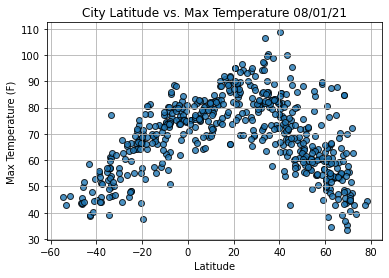

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

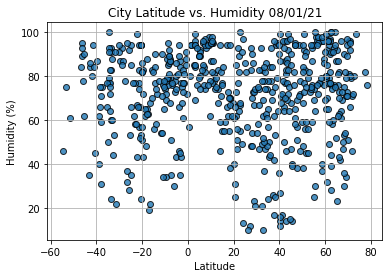

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

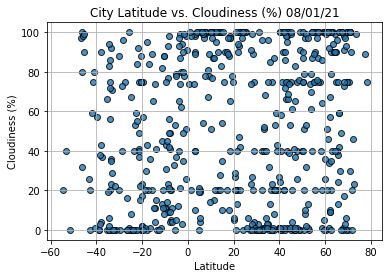

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

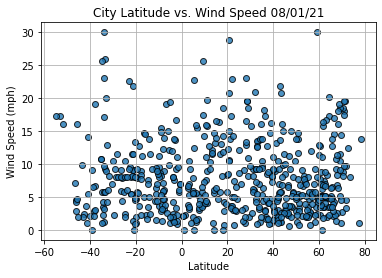

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    print("R value = " + str(r_value))

In [73]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-08-01 22:24:11
Lat                       22.0752
Lng                      -159.319
Max Temp                    84.18
Humidity                       77
Cloudiness                     90
Wind Speed                   5.01
Name: 13, dtype: object

In [74]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
566    False
567    False
568     True
569    False
570     True
Name: Lat, Length: 571, dtype: bool

In [75]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Zaozerne,UA,2021-08-01 22:26:05,45.1582,33.2787,72.95,68,0,3.09
6,Hastings,GB,2021-08-01 22:24:19,50.8552,0.5729,61.29,99,51,5.48
11,Pedernales,DO,2021-08-01 22:26:07,18.0384,-71.7440,88.92,55,88,14.25
13,Kapaa,US,2021-08-01 22:24:11,22.0752,-159.3190,84.18,77,90,5.01
14,Bathsheba,BB,2021-08-01 22:26:08,13.2167,-59.5167,83.01,74,20,11.50
...,...,...,...,...,...,...,...,...,...
563,Lacolle,CA,2021-08-01 22:28:14,45.0834,-73.3659,66.34,85,100,3.83
564,Polyarnyy,RU,2021-08-01 22:28:14,69.1989,33.4478,54.07,79,93,9.01
565,Dafeng,CN,2021-08-01 22:28:14,23.4517,108.5881,77.90,91,97,3.09
568,Cedar Rapids,US,2021-08-01 22:24:39,42.0083,-91.6441,80.10,50,20,5.01


In [76]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Zaozerne,UA,2021-08-01 22:26:05,45.1582,33.2787,72.95,68,0,3.09
6,Hastings,GB,2021-08-01 22:24:19,50.8552,0.5729,61.29,99,51,5.48
11,Pedernales,DO,2021-08-01 22:26:07,18.0384,-71.7440,88.92,55,88,14.25
13,Kapaa,US,2021-08-01 22:24:11,22.0752,-159.3190,84.18,77,90,5.01
14,Bathsheba,BB,2021-08-01 22:26:08,13.2167,-59.5167,83.01,74,20,11.50


In [77]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

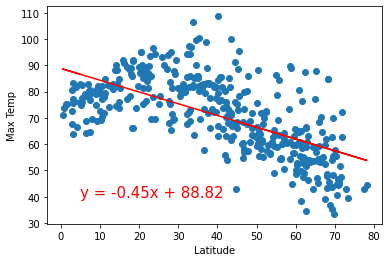

R value = -0.6353173266344007


In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,40))

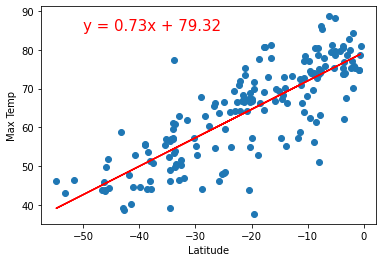

R value = 0.802967779692388


In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

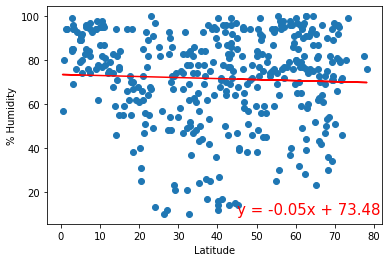

R value = -0.0448197315892595


In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

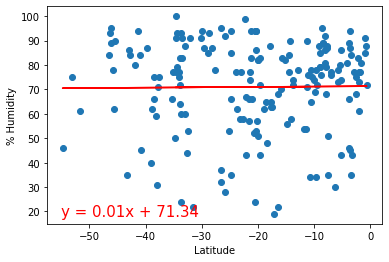

R value = 0.010589670603688789


In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,18))

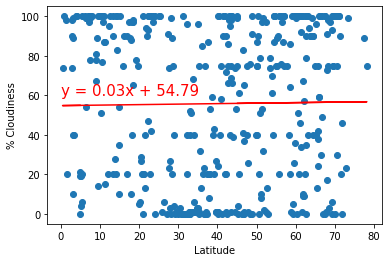

R value = 0.013174289553197823


In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))

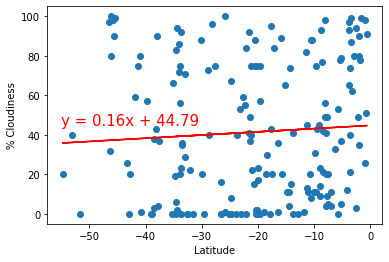

R value = 0.06413128449399388


In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,45))

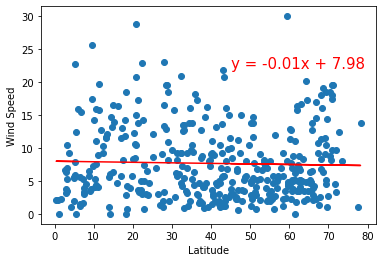

R value = -0.030491945986922276


In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,22))

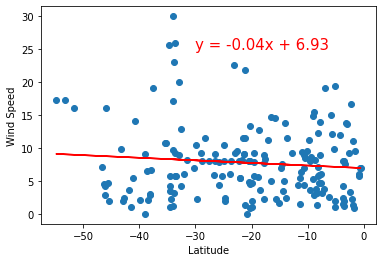

R value = -0.09698492317872942


In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,25))